In [31]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error as mae
from sklearn.preprocessing import StandardScaler

from keras.models import Model
from keras.layers import Input, LSTM, GRU, SimpleRNN, Dense
import keras.backend as K
from tensorflow.keras.optimizers import SGD, Adam


In [32]:
# get the data
df = pd.read_csv('https://raw.githubusercontent.com/lazyprogrammer/machine_learning_examples/master/tf2.0/sbux.csv')

In [33]:
df.head()

,date,open,high,low,close,volume,Name
0,2013-02-08,27.920,28.325,27.920,28.185,7146296,SBUX
1,2013-02-11,28.260,28.260,27.930,28.070,5457354,SBUX
2,2013-02-12,28.000,28.275,27.975,28.130,8665592,SBUX
3,2013-02-13,28.230,28.230,27.750,27.915,7022056,SBUX
4,2013-02-14,27.765,27.905,27.675,27.775,8899188,SBUX


In [34]:
# calculate returns by first shifting the data
df['PrevClose'] = df['close'].shift(1) # move everything up 1

# so now it's like
# close / prev close
# x[2] x[1]
# x[3] x[2]
# x[4] x[3]
# ...
# x[t] x[t-1]

In [35]:
# then the return is
# (x[t] - x[t-1]) / x[t-1]
df['Return'] = (df['close'] - df['PrevClose']) / df['PrevClose']

In [36]:
df.head()

,date,open,high,low,close,volume,Name,PrevClose,Return
0,2013-02-08,27.920,28.325,27.920,28.185,7146296,SBUX,NaN,NaN
1,2013-02-11,28.260,28.260,27.930,28.070,5457354,SBUX,28.185,-0.004080
2,2013-02-12,28.000,28.275,27.975,28.130,8665592,SBUX,28.070,0.002138
3,2013-02-13,28.230,28.230,27.750,27.915,7022056,SBUX,28.130,-0.007643
4,2013-02-14,27.765,27.905,27.675,27.775,8899188,SBUX,27.915,-0.005015


In [37]:
# Now turn the full data into numpy arrays

# Not yet in the final "X" format!
input_data = df[['open', 'high', 'low', 'close', 'volume']].values
targets = df['Return'].values

In [38]:
# Set Ntrain to two-thirds of the dataset
N = len(input_data)
Ntrain = N * 2 // 3

In [39]:
# Set number of prev. time steps to use
T = 10

# Set input dimensionality
D = input_data.shape[1]

In [40]:
input_data_train = input_data[:Ntrain + T - 1]

In [41]:
# scale the data
scaler = StandardScaler()
scaler.fit(input_data_train)
input_data = scaler.transform(input_data)

In [42]:
# Setup X_train and Y_train
X_train = np.zeros((Ntrain, T, D))
Y_train = np.zeros(Ntrain)

for t in range(Ntrain):
  X_train[t, :, :] = input_data[t:t+T]
  Y_train[t] = (targets[t+T] > 0)

In [43]:
N - Ntrain

420

In [50]:
# Setup X_test and Y_test
X_test = np.zeros((N - Ntrain, T, D))
Y_test = np.zeros(N - Ntrain)
print(len(targets))
for u in range(N - Ntrain):
  # u counts from 0...(N - Ntrain)
  # t counts from Ntrain...N
  t = u + Ntrain
X_test[u, :, :] = input_data[t:t+T]
Y_test[u] = (targets[t] > 0)
#print(t+T)

1259


In [51]:
# make the RNN
i = Input(shape=(T, D))
x = LSTM(50)(i)
x = Dense(1, activation='sigmoid')(x)
model = Model(i, x)
model.compile(
  loss='binary_crossentropy',
  optimizer=Adam(lr=0.001),
  metrics=['accuracy'],
)

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


In [52]:
Y_test

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.

In [53]:
# train the RNN
r = model.fit(
  X_train, Y_train,
  batch_size=32,
  epochs=300,
  validation_data=(X_test, Y_test),
)

Epoch 1/300
27/27 [==============================] - 35s 25ms/step - loss: 0.6940 - accuracy: 0.5089 - val_loss: 0.7294 - val_accuracy: 0.0000e+00
Epoch 2/300
27/27 [==============================] - 0s 8ms/step - loss: 0.6916 - accuracy: 0.5304 - val_loss: 0.7189 - val_accuracy: 0.0000e+00
Epoch 3/300
27/27 [==============================] - 0s 8ms/step - loss: 0.6919 - accuracy: 0.5256 - val_loss: 0.7354 - val_accuracy: 0.0000e+00
Epoch 4/300
27/27 [==============================] - 0s 8ms/step - loss: 0.6916 - accuracy: 0.5161 - val_loss: 0.7348 - val_accuracy: 0.0000e+00
Epoch 5/300
27/27 [==============================] - 0s 8ms/step - loss: 0.6901 - accuracy: 0.5221 - val_loss: 0.7438 - val_accuracy: 0.0000e+00
Epoch 6/300
27/27 [==============================] - 0s 7ms/step - loss: 0.6886 - accuracy: 0.5387 - val_loss: 0.7497 - val_accuracy: 0.0000e+00
Epoch 7/300
27/27 [==============================] - 0s 7ms/step - loss: 0.6914 - accuracy: 0.5244 - val_loss: 0.7548 - val_accu

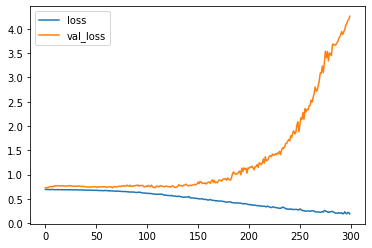

In [54]:
# plot the loss
plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label='val_loss')
plt.legend()
plt.show()

In [56]:
#r.history

{'accuracy': [0.5089392066001892,
  0.5303933024406433,
  0.5256257653236389,
  0.5160905718803406,
  0.5220500826835632,
  0.5387365818023682,
  0.5244338512420654,
  0.5292014479637146,
  0.547079861164093,
  0.5375446677207947,
  0.5411204099655151,
  0.5411204099655151,
  0.5280095338821411,
  0.5351608991622925,
  0.5399284958839417,
  0.5542312264442444,
  0.5435041785240173,
  0.5530393123626709,
  0.5518474578857422,
  0.5423122644424438,
  0.5589988231658936,
  0.5566149950027466,
  0.5554231405258179,
  0.5613825917243958,
  0.547079861164093,
  0.5542312264442444,
  0.5601906776428223,
  0.5613825917243958,
  0.5649582743644714,
  0.5518474578857422,
  0.5554231405258179,
  0.5661501884460449,
  0.5709177851676941,
  0.563766360282898,
  0.5864123702049255,
  0.5542312264442444,
  0.5566149950027466,
  0.563766360282898,
  0.5852205157279968,
  0.5685339570045471,
  0.5601906776428223,
  0.5744934678077698,
  0.5709177851676941,
  0.5673421025276184,
  0.5578069090843201,
  

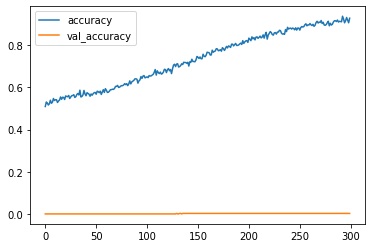

In [58]:
# Plot accuracy per iteration
plt.plot(r.history['accuracy'], label='accuracy')
plt.plot(r.history['val_accuracy'], label='val_accuracy')
plt.legend()
plt.show()